# WTI Price Prediction
This notebook will walkthrough my solution for predicting WTI prices on Friday, November 16th. Please see my EDA section to help understand my assumptions for the current model. The price data for WTI ends November 5th which does not reflect the current downtrend in the market (WTI has dropped 10% since then)

Requirements:
pip install -U quandl numpy pandas fbprophet matplotlib pytrends pystan



In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from fbprophet import Prophet
import quandl

In [39]:
#WTI contains data from 1988, model estimates with data this 
#far back make prediction weaker but more reflective with the trend that is developing since November 01.

#wti = quandl.get("EIA/PET_RWTC_D")
#wti.reset_index(inplace=True)
#wti.columns= ['ds', 'y']


In [40]:
xls= pd.ExcelFile("DCOILWTICO.xls")
df= xls.parse("FRED Graph")
df= df.iloc[10:]
df.columns= ['ds', 'y']
df['ds']= df['ds'].astype('datetime64[ns]')
df= df[df.y != 0]



In [41]:
df.dropna()
df.isnull().values.any()

False

In [42]:
df.head()

,ds,y
10,2013-11-05,93.4
11,2013-11-06,94.74
12,2013-11-07,94.25
13,2013-11-08,94.56
14,2013-11-11,95.13


In [29]:
#df['y_orig'] = df['y']
#log transform price
#df['y'] = pd.to_numeric(df['y'], errors = 'coerce')
#df['y']= np.log(df['y'])

# Fit model to FBProphet
FBProphet is a procedure for forecasting time series data at scale. It's based on an additive model where non-linear trends are fit with daily, monthly, yearly and holiday seasonality. Creating an accurate ARIMA model from scratch requires substantial experience with market knowledge, using FBProphet, I'm able to model daily changes in prices and accomodate the volatility in the market-- moreover, I can account for historical trends such as the 2008 market crash (although this data does not contain that). 
In sum, I chose this model because it provided me with both efficiency and accuracy given the time provided for this project. Documentation can be found: https://facebook.github.io/prophet/docs/quick_start.html 

In [43]:
#Allow the model to fit at a daily level and increase malleability to volatility in the market
model = Prophet(daily_seasonality= True, seasonality_prior_scale= 10, changepoint_prior_scale= 5)
model.fit(df)

In [44]:
future_data = model.make_future_dataframe(periods= 60, freq='d')

In [45]:
forecast_data = model.predict(future_data)

In [46]:
forecast_data[['ds', 'yhat','yhat_lower','yhat_upper']].tail(n=60)

,ds,yhat,yhat_lower,yhat_upper
1259,2018-11-06,70.616581,67.794224,73.210229
1260,2018-11-07,70.821666,67.938180,73.522821
1261,2018-11-08,71.039118,68.412820,73.870599
1262,2018-11-09,71.280085,68.576632,73.989792
1263,2018-11-10,70.158714,67.219835,72.784889
1264,2018-11-11,70.380536,67.527193,73.081372
1265,2018-11-12,71.865784,69.022678,74.502709
1266,2018-11-13,72.150051,69.402471,74.767525
1267,2018-11-14,72.332734,69.384292,75.043698
1268,2018-11-15,72.507716,69.611467,75.054834


In [48]:
current = forecast_data.merge(df, on="ds", how="left")
current= current.dropna()
current= current.set_index('ds')
current.tail(n=10)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
ds,,,,,,,,,,,,,,,,,,,,,
2018-10-23,64.943587,67.011954,72.202634,64.943587,64.943587,4.586572,4.586572,4.586572,7.581231,7.581231,...,0.400713,0.400713,-3.395373,-3.395373,-3.395373,0.0,0.0,0.0,69.530159,66.49
2018-10-24,64.986179,66.565671,72.081521,64.986179,64.986179,4.466321,4.466321,4.466321,7.581231,7.581231,...,0.389250,0.389250,-3.504160,-3.504160,-3.504160,0.0,0.0,0.0,69.452500,66.56
2018-10-25,65.028771,66.576460,72.070561,65.028771,65.028771,4.371176,4.371176,4.371176,7.581231,7.581231,...,0.383888,0.383888,-3.593943,-3.593943,-3.593943,0.0,0.0,0.0,69.399947,67.25
2018-10-26,65.071363,66.613872,71.878974,65.071363,65.071363,4.317690,4.317690,4.317690,7.581231,7.581231,...,0.399102,0.399102,-3.662643,-3.662643,-3.662643,0.0,0.0,0.0,69.389053,67.58
2018-10-29,65.199139,66.658000,71.910693,65.199139,65.199139,4.175549,4.175549,4.175549,7.581231,7.581231,...,0.322354,0.322354,-3.728037,-3.728037,-3.728037,0.0,0.0,0.0,69.374687,67
2018-10-30,65.241731,66.932633,72.294491,65.241731,65.241731,4.281302,4.281302,4.281302,7.581231,7.581231,...,0.400713,0.400713,-3.700643,-3.700643,-3.700643,0.0,0.0,0.0,69.523033,66.18
2018-10-31,65.284322,66.925526,72.303090,65.284322,65.284322,4.321685,4.321685,4.321685,7.581231,7.581231,...,0.389250,0.389250,-3.648797,-3.648797,-3.648797,0.0,0.0,0.0,69.606007,65.31
2018-11-01,65.326914,67.057792,72.345477,65.326914,65.326914,4.391755,4.391755,4.391755,7.581231,7.581231,...,0.383888,0.383888,-3.573364,-3.573364,-3.573364,0.0,0.0,0.0,69.718670,63.67
2018-11-02,65.369506,67.051703,72.330042,65.369506,65.369506,4.504627,4.504627,4.504627,7.581231,7.581231,...,0.399102,0.399102,-3.475707,-3.475707,-3.475707,0.0,0.0,0.0,69.874133,63.12


# The Model
This model is clearly overfitting. However, as discussed in my EDA, it appears that trends in commodity prices are greatly affected by the geopolitcal climate. The recent dip in Novemeber can be attributed to a number of events (e.g. ---- ). A more accurate prediction may be built by using those parameters as features in the dataset. However, at this time FBprophet only builds a time series model with a single input parameter. For future models, I'd consider a hybrid ARIMA and RNN model. However, given my EDA and current knowledge of the market, I think any model is limited to the type of data as opposed to the model itself-- in order to have accurate future forecasts, creativity is needed in finding the correct parameters (e.g., follow the oil supply chain). 

In [49]:
r2= r2_score(current.y, current.yhat)
print(f"The R2 is: {r2}")

MSE = mean_squared_error(current.y, current.yhat)
print(f"The MSE is: {MSE}")

The R2 is: 0.9894653621402271
The MSE is: 4.486500379093967


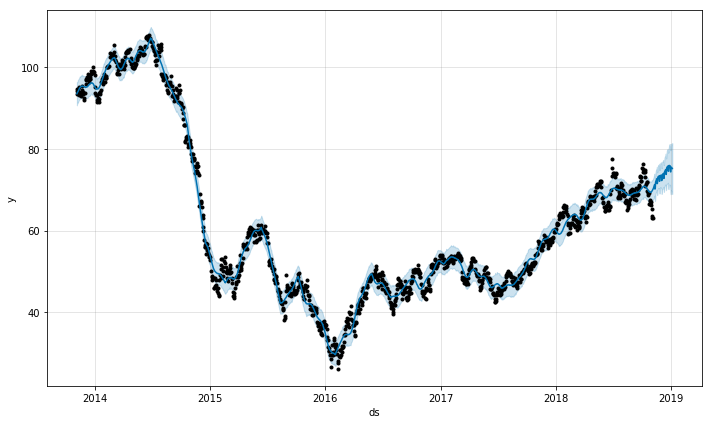

In [50]:
figure = model.plot(forecast_data)

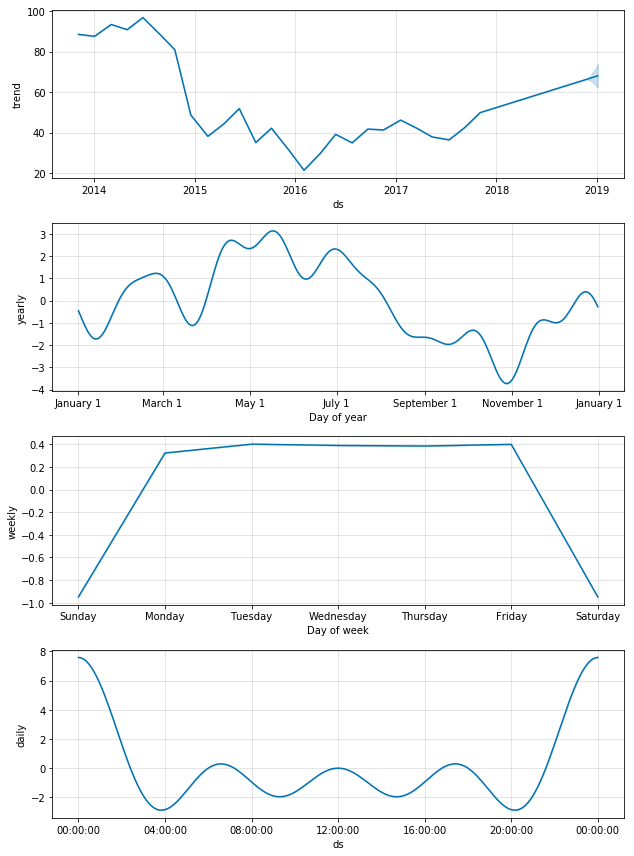

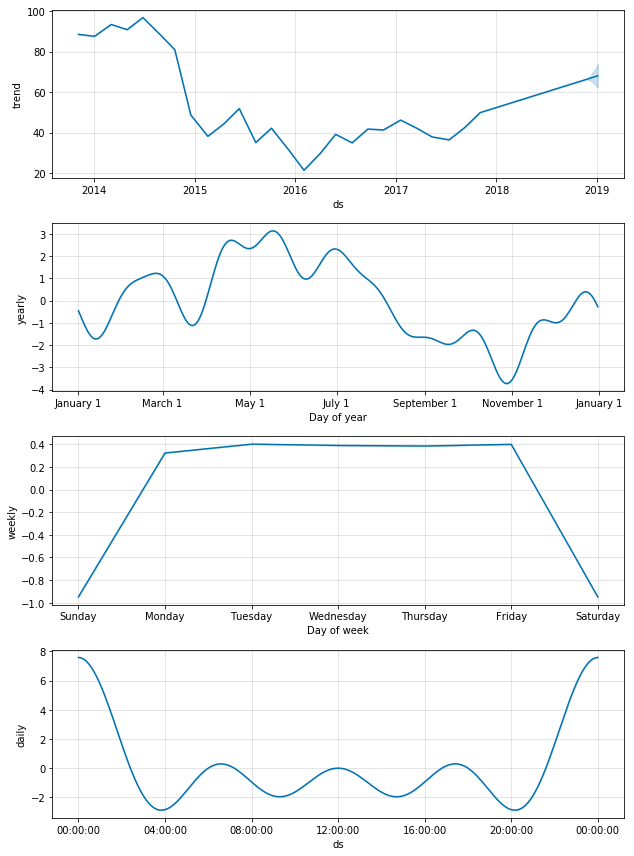

In [51]:
model.plot_components(forecast_data)

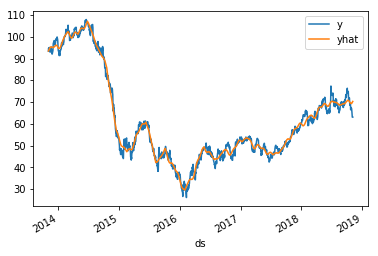

In [52]:
#Make it more visible to catch where model is off. The current model is good at predicting long term trends.. Not so much daily.
current = forecast_data.merge(df, on="ds", how="left")
current= current.dropna()
current= current.set_index('ds')
current[["y", "yhat"]].plot()


Text(0.5, 0, 'Date')

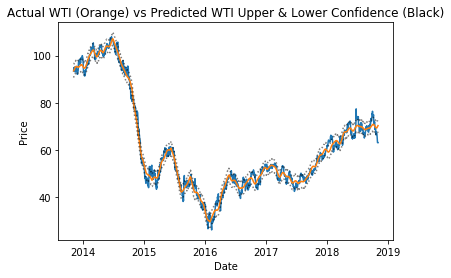

In [53]:
fig, ax1 = plt.subplots()
ax1.plot(current.y)
ax1.plot(current.yhat)
ax1.plot(current.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(current.yhat_lower, color='black',  linestyle=':', alpha=0.5)
 
ax1.set_title('Actual WTI (Orange) vs Predicted WTI Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

# The Hindsight Model
Given that the previous model suffers from overfitting and is poor at predicting the recent bear market for WTI, I'll create a shorter term model to predict what daily prices will be for November 16th. My assumption here is that past market behaviors on the yearly level do not affect daily levels. I will create a model that only looks at 2018.

In [54]:
df['year'] = pd.to_datetime(df['ds']).dt.year

In [55]:
df2= df[df['year']>2017]

In [56]:
#Allow the model to fit at a daily level and increase malleability to volatility in the market
model_two = Prophet(daily_seasonality= True, weekly_seasonality=True, seasonality_prior_scale= 20, changepoint_prior_scale= 10)
model_two.fit(df)

In [57]:
future_two = model_two.make_future_dataframe(periods= 10, freq='d')
forecast_two = model_two.predict(future_two)

forecast_two[['ds', 'yhat','yhat_lower','yhat_upper']].tail(n=10)

,ds,yhat,yhat_lower,yhat_upper
1259,2018-11-06,70.461222,67.925966,73.156513
1260,2018-11-07,70.666316,67.753491,73.317794
1261,2018-11-08,70.883659,68.166815,73.747424
1262,2018-11-09,71.126097,68.460210,74.023725
1263,2018-11-10,70.014397,67.260707,72.711369
1264,2018-11-11,70.237042,67.608499,72.955798
1265,2018-11-12,71.716147,68.803258,74.359538
1266,2018-11-13,71.999643,69.157944,74.891962
1267,2018-11-14,72.183317,69.452988,74.883484
1268,2018-11-15,72.359251,69.435166,74.943586


In [58]:
model_two = forecast_two.merge(df2, on="ds", how="left")
model_two= model_two.dropna()
model_two= model_two.set_index('ds')
model_two.tail(n=10)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,year
ds,,,,,,,,,,,,,,,,,,,,,
2018-10-23,64.969113,66.701183,72.105658,64.969113,64.969113,4.406463,4.406463,4.406463,7.530479,7.530479,...,0.398024,-3.522040,-3.522040,-3.522040,0.0,0.0,0.0,69.375576,66.49,2018.0
2018-10-24,65.011462,66.642595,72.098842,65.011462,65.011462,4.285820,4.285820,4.285820,7.530479,7.530479,...,0.386234,-3.630893,-3.630893,-3.630893,0.0,0.0,0.0,69.297282,66.56,2018.0
2018-10-25,65.053812,66.607533,71.907940,65.053812,65.053812,4.190116,4.190116,4.190116,7.530479,7.530479,...,0.380325,-3.720688,-3.720688,-3.720688,0.0,0.0,0.0,69.243928,67.25,2018.0
2018-10-26,65.096162,66.659553,71.891455,65.096162,65.096162,4.137582,4.137582,4.137582,7.530479,7.530479,...,0.396457,-3.789354,-3.789354,-3.789354,0.0,0.0,0.0,69.233744,67.58,2018.0
2018-10-29,65.223211,66.510304,71.981298,65.223211,65.223211,3.997610,3.997610,3.997610,7.530479,7.530479,...,0.321578,-3.854447,-3.854447,-3.854447,0.0,0.0,0.0,69.220821,67,2018.0
2018-10-30,65.265561,66.853178,72.023874,65.265561,65.265561,4.101607,4.101607,4.101607,7.530479,7.530479,...,0.398024,-3.826896,-3.826896,-3.826896,0.0,0.0,0.0,69.367168,66.18,2018.0
2018-10-31,65.307911,66.629243,71.926850,65.307911,65.307911,4.141847,4.141847,4.141847,7.530479,7.530479,...,0.386234,-3.774866,-3.774866,-3.774866,0.0,0.0,0.0,69.449758,65.31,2018.0
2018-11-01,65.350261,66.635572,72.240145,65.350261,65.350261,4.211585,4.211585,4.211585,7.530479,7.530479,...,0.380325,-3.699219,-3.699219,-3.699219,0.0,0.0,0.0,69.561846,63.67,2018.0
2018-11-02,65.392611,66.830412,72.497267,65.392611,65.392611,4.325627,4.325627,4.325627,7.530479,7.530479,...,0.396457,-3.601309,-3.601309,-3.601309,0.0,0.0,0.0,69.718238,63.12,2018.0


In [59]:
r2= r2_score(model_two.y, model_two.yhat)
print(f"The R2 is: {r2}")

MSE = mean_squared_error(model_two.y, model_two.yhat)
print(f"The MSE is: {MSE}")

The R2 is: 0.5696670765368864
The MSE is: 6.611253435576566


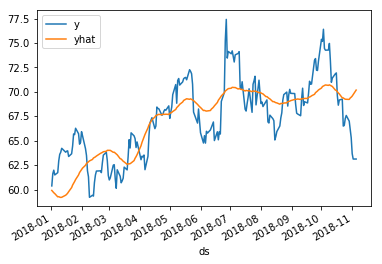

In [60]:
model_two[["y", "yhat"]].plot()

# Conclusion
I thought by examining the year 2018 I'd be able to smooth out the prediction and come to a more accurate conclusion. However, it looks like I'm unable to account for the recent dip in the data. This is a difficult task as the price of WTI plummeted $17/barrel.

If I had to make a prediction based on this analysis, I'd go with my original model and conclude that the price of WTI on November 15, 2018 would be: Predicted:73.739258, 80% CI[69.448944, 77.416131]. Given that I know the price of oil is currently $60, this model does a poor job estimating at a daily level-- however, if we change investment strategies and look long term, the original model looks promising. Let's see how it does by the end of this year!